# **Emotion Detection From Text**

# **Introduction**
Emotion detection from text is about understanding the feelings or emotions expressed in written words. It is useful in areas like customer feedback, social media analysis, and mental health support.

This project focuses on creating a system that can identify emotions like happiness, sadness, anger, and fear in text. By using machine learning and natural language processing (NLP), the system will analyze text and classify the emotions it contains.



# **Goal of the Project**
   The goal of this project is to develop a system that can accurately identify and categorize emotions expressed in text using machine learning and natural language processing (NLP) techniques. This system aims to help understand the feelings conveyed in written content, enabling applications in areas such as customer feedback analysis, social media monitoring, and mental health support.

# **Data Story**
   The Emotion Dataset Raw is a labeled dataset designed for sentiment analysis and emotion detection tasks in natural language processing (NLP). It contains two columns:

1.Text: Sentences or phrases representing various contexts and topics.

2.Emotion: Emotion labels corresponding to the primary emotion expressed in the text (e.g., happy, sad, angry, fear, etc.).

This dataset provides a foundation for training and evaluating models for emotion classification and can be used in applications like chatbots, recommendation systems, and mental health monitoring. It is well-suited for supervised learning approaches and fine-tuning NLP models for emotion understanding.

In [ ]:
# importing necessery libraries
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import joblib
from sklearn.pipeline import Pipeline




In [ ]:
# NLTK Downloads
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
df=pd.read_csv("/content/nlp_dataset (3).csv")
df

,Text,Emotion
0,i seriously hate one subject to death but now ...,fear
1,im so full of life i feel appalled,anger
2,i sit here to write i start to dig out my feel...,fear
3,ive been really angry with r and i feel like a...,joy
4,i feel suspicious if there is no one outside l...,fear
...,...,...
5932,i begun to feel distressed for you,fear
5933,i left feeling annoyed and angry thinking that...,anger
5934,i were to ever get married i d have everything...,joy
5935,i feel reluctant in applying there because i w...,fear


In [ ]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5937 entries, 0 to 5936
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Text     5937 non-null   object
 1   Emotion  5937 non-null   object
dtypes: object(2)
memory usage: 92.9+ KB


In [ ]:
df.describe() # The Emotion column has 8 unique categories.These represent the different emotions (e.g., joy, fear, anger, etc.).
                # The Text column has 5937 unique text entries, meaning some texts are repeated

,Text,Emotion
count,5937,5937
unique,5934,3
top,i feel like a tortured artist when i talk to her,anger
freq,2,2000


In [ ]:
df.isnull().sum()  # The data set doesn't contain any null values.

,0
Text,0
Emotion,0


In [ ]:
df.duplicated().sum() # the data set contains about 3630 dulplicates and this may affect the perfomace of our model.

0

**Preparing Labels**

In [ ]:
label_encoder=LabelEncoder()

df['Emotion_labeled'] = label_encoder.fit_transform(df['Emotion'])

# **Data preprocessing**

In [ ]:
!pip install neattext
import neattext.functions as nfx

# Remove user headles()

df['Cleaned_Text']=df['Text'].apply(nfx.remove_userhandles)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.7/114.7 kB 2.5 MB/s eta 0:00:00


**Tokenization**

In [ ]:
x=df['Cleaned_Text']
from nltk.tokenize import word_tokenize
x_token=x.apply(word_tokenize)
x_token.head()

,Cleaned_Text
0,"[i, seriously, hate, one, subject, to, death, ..."
1,"[im, so, full, of, life, i, feel, appalled]"
2,"[i, sit, here, to, write, i, start, to, dig, o..."
3,"[ive, been, really, angry, with, r, and, i, fe..."
4,"[i, feel, suspicious, if, there, is, no, one, ..."


**LowerCase Tokens**

In [ ]:
 x_token= x_token.apply(lambda tokens: [token.lower() for token in tokens])
 x_token.head()

,Cleaned_Text
0,"[i, seriously, hate, one, subject, to, death, ..."
1,"[im, so, full, of, life, i, feel, appalled]"
2,"[i, sit, here, to, write, i, start, to, dig, o..."
3,"[ive, been, really, angry, with, r, and, i, fe..."
4,"[i, feel, suspicious, if, there, is, no, one, ..."


**Stopwords Removel**

In [ ]:
stopwords_set = set(stopwords.words('english'))

x_token = x_token.apply(lambda i: [word for word in i if word not in stopwords_set])

x_token.head()

,Cleaned_Text
0,"[seriously, hate, one, subject, death, feel, r..."
1,"[im, full, life, feel, appalled]"
2,"[sit, write, start, dig, feelings, think, afra..."
3,"[ive, really, angry, r, feel, like, idiot, tru..."
4,"[feel, suspicious, one, outside, like, rapture..."


**Lemmatization**

In [ ]:
lemmatizer= WordNetLemmatizer()
x_token = x_token.apply(lambda i: [lemmatizer.lemmatize(word) for word in i])
x_token.head()

,Cleaned_Text
0,"[seriously, hate, one, subject, death, feel, r..."
1,"[im, full, life, feel, appalled]"
2,"[sit, write, start, dig, feeling, think, afrai..."
3,"[ive, really, angry, r, feel, like, idiot, tru..."
4,"[feel, suspicious, one, outside, like, rapture..."


**Avoid Punctuations**

In [ ]:
import string
punctuation_set=set(string.punctuation)

In [ ]:
x_token= x_token.apply(lambda i:[word for word in i if word not in punctuation_set])
x_token.head()

,Cleaned_Text
0,"[seriously, hate, one, subject, death, feel, r..."
1,"[im, full, life, feel, appalled]"
2,"[sit, write, start, dig, feeling, think, afrai..."
3,"[ive, really, angry, r, feel, like, idiot, tru..."
4,"[feel, suspicious, one, outside, like, rapture..."


In [ ]:
#Join tokens into a single string for each row
x_token_strings = x_token.apply(lambda tokens: " ".join(tokens))
print(x_token_strings.head())

0    seriously hate one subject death feel reluctan...
1                           im full life feel appalled
2    sit write start dig feeling think afraid accep...
3    ive really angry r feel like idiot trusting fi...
4    feel suspicious one outside like rapture happe...
Name: Cleaned_Text, dtype: object


# **EDA**

<ipython-input-17-bc7d15a374b1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Emotion', palette='viridis')


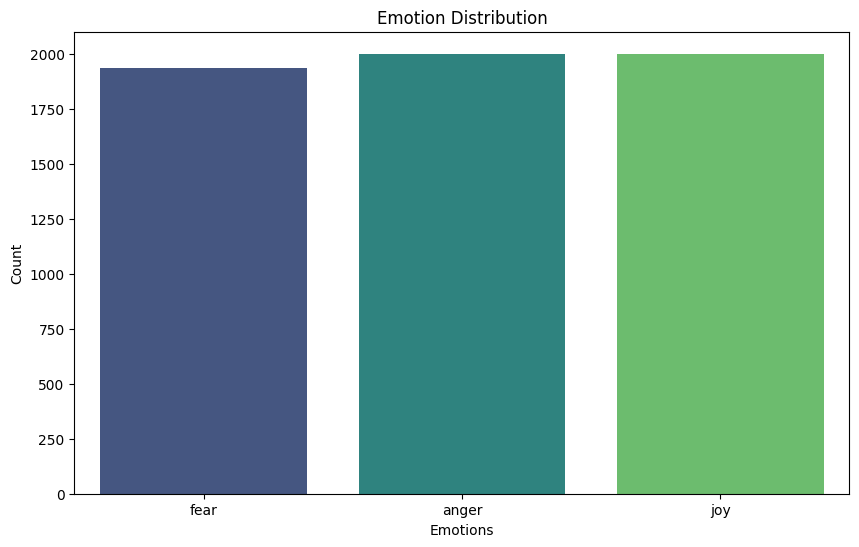

In [ ]:
count=df['Emotion'].value_counts()
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Emotion', palette='viridis')
plt.title("Emotion Distribution")
plt.xlabel("Emotions")
plt.ylabel("Count")
plt.show()

The emotions in the dataset are relatively balanced, meaning there are nearly equal instances for each emotion. This is indicated by the similar heights of the bars for each category.

In [ ]:
# Word cloud
def draw_word_cloud(df, column_name, title):
    text = " ".join(df[column_name]) # joins all the text data in data[colum_name] column into a single string with a space (' ') between them
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis("off")
    plt.show()


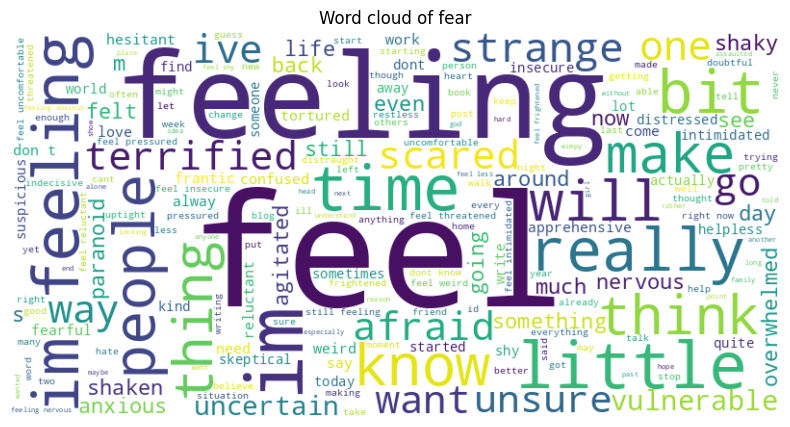

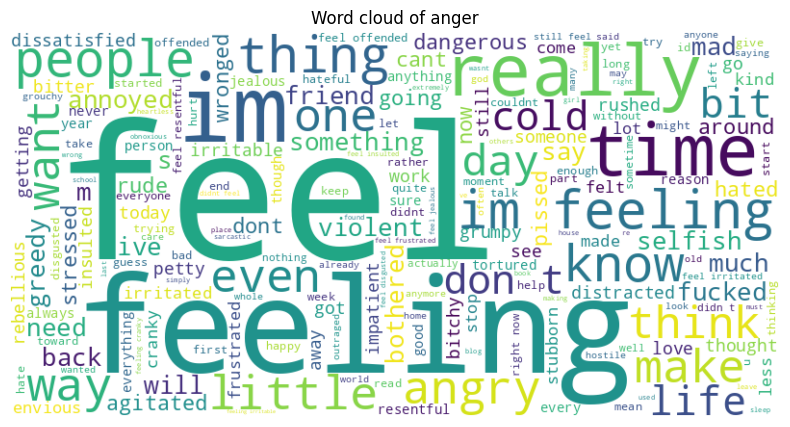

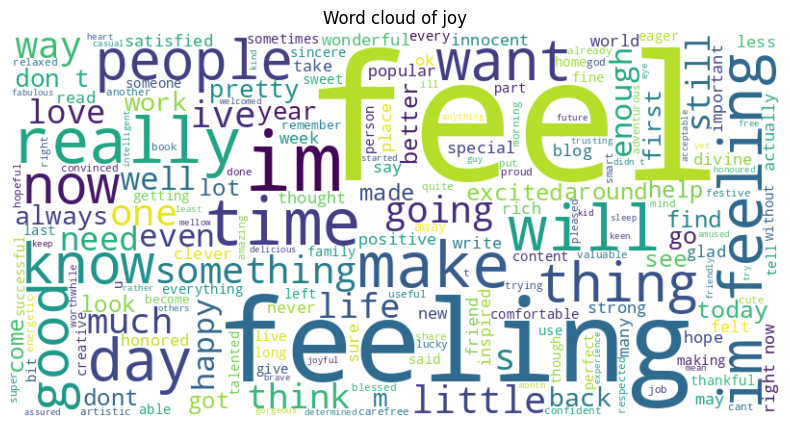

In [ ]:
# Loop through each unique emotion and generate a word cloud
for emotion in df['Emotion'].unique():
    emotion_rows = df[df['Emotion'] == emotion]  # Filter rows for the current emotion
    draw_word_cloud(emotion_rows, 'Text', f"Word cloud of {emotion}")  # Pass the filtered data, text column, and emotion title


A word cloud is a visual representation of text data where the size of each word indicates its frequency or importance in the dataset. It provides a quick overview of the most common terms, making it easier to identify key themes or topics in the text.

# **Feature Extraction**

In [ ]:
vectorizer=CountVectorizer()
X=vectorizer.fit_transform(x_token_strings).toarray()

CountVectorizer is a tool from the Scikit-learn library used for text feature extraction. It transforms a collection of text documents into a numerical representation by counting the occurrences of each word in the text. This representation is often used as input for machine learning models in Natural Language Processing (NLP) tasks.



# **Train-Test Split**

In [ ]:

Y=df['Emotion_labeled']
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

# **Model Building**

Naive Bayas Model

In [ ]:
naive_bayas_model=MultinomialNB()
naive_bayas_model.fit(x_train,y_train)
y_pred=naive_bayas_model.predict(x_test)


In [ ]:
accuracy_naive_bayas=accuracy_score(y_test,y_pred)
print(f"Naive Bayas- Accuracy: {accuracy_naive_bayas:.4f}")
cm=confusion_matrix(y_test,y_pred)
cr=classification_report(y_test,y_pred)
print("Confusion Matrix :")
print(cm)
print("\n")
print(f"Classification Report of Navie Bayas Model:")
print(cr)


Naive Bayas- Accuracy: 0.8973
Confusion Matrix :
[[357  20  15]
 [ 18 385  13]
 [ 29  27 324]]


Classification Report of Navie Bayas Model:
              precision    recall  f1-score   support

           0       0.88      0.91      0.90       392
           1       0.89      0.93      0.91       416
           2       0.92      0.85      0.89       380

    accuracy                           0.90      1188
   macro avg       0.90      0.90      0.90      1188
weighted avg       0.90      0.90      0.90      1188



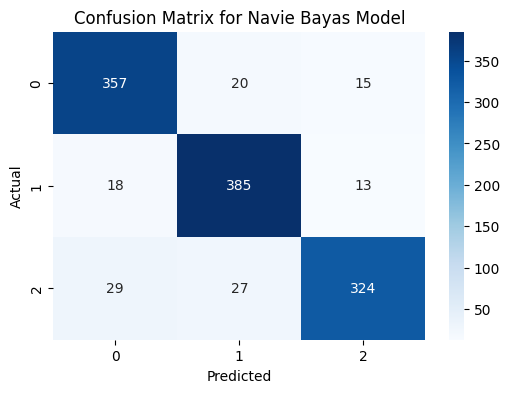

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f"Confusion Matrix for Navie Bayas Model")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



*   0--> anger
*   1-->fear
*   2-->joy





xgboost Model


In [ ]:
xgboost_model=XGBClassifier()
xgboost_model.fit(x_train,y_train)
y_pred=xgboost_model.predict(x_test)

In [ ]:
accuracy_XGboost=accuracy_score(y_test,y_pred)
print(f"XGboost- Accuracy: {accuracy_XGboost:.4f}")
cm=confusion_matrix(y_test,y_pred)
cr=classification_report(y_test,y_pred)
print("Confusion Matrix :")
print(cm)
print("\n")
print(f"Classification Report of XGboost:")
print(cr)


XGboost- Accuracy: 0.9377
Confusion Matrix :
[[368   2  22]
 [ 24 376  16]
 [  4   6 370]]


Classification Report of XGboost:
              precision    recall  f1-score   support

           0       0.93      0.94      0.93       392
           1       0.98      0.90      0.94       416
           2       0.91      0.97      0.94       380

    accuracy                           0.94      1188
   macro avg       0.94      0.94      0.94      1188
weighted avg       0.94      0.94      0.94      1188



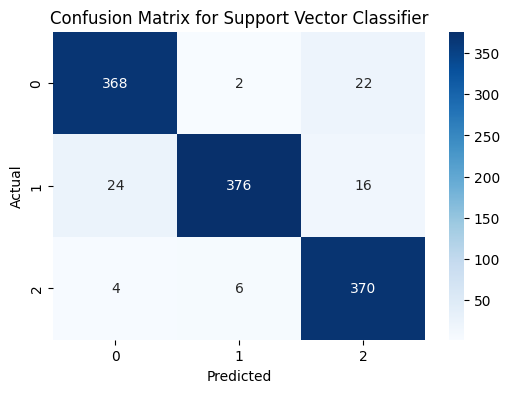

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f"Confusion Matrix for Support Vector Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Logistic Regression Model

In [ ]:
logistic_model=LogisticRegression()
logistic_model.fit(x_train,y_train)
y_pred=logistic_model.predict(x_test)


In [ ]:
accuracy_logistic=accuracy_score(y_test,y_pred)
print(f"Logistic Regression Model- Accuracy: {accuracy_logistic:.4f}")
cm=confusion_matrix(y_test,y_pred)
cr=classification_report(y_test,y_pred)
print("Confusion Matrix :")
print(cm)
print("\n")
print(f"Classification Report of Logistic Regression Model:")
print(cr)


Logistic Regression Model- Accuracy: 0.9461
Confusion Matrix :
[[375   7  10]
 [ 19 382  15]
 [  6   7 367]]


Classification Report of Logistic Regression Model:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       392
           1       0.96      0.92      0.94       416
           2       0.94      0.97      0.95       380

    accuracy                           0.95      1188
   macro avg       0.95      0.95      0.95      1188
weighted avg       0.95      0.95      0.95      1188



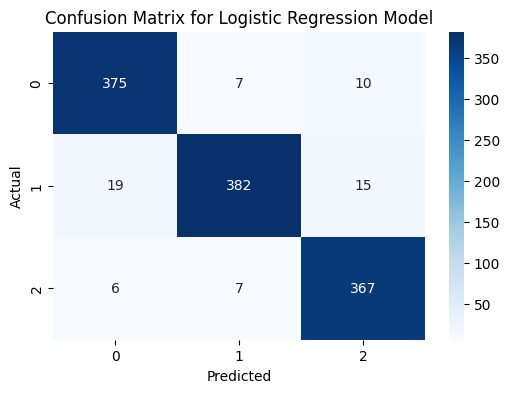

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f"Confusion Matrix for Logistic Regression Model")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Random Forest

In [ ]:
random_forest_model=RandomForestClassifier()
random_forest_model.fit(x_train,y_train)
y_pred=random_forest_model.predict(x_test)


In [ ]:
accuracy_random=accuracy_score(y_test,y_pred)
print(f"Random forest - Accuracy: {accuracy_random:.4f}")
cm=confusion_matrix(y_test,y_pred)
cr=classification_report(y_test,y_pred)
print("Confusion Matrix :")
print(cm)
print("\n")
print(f"Classification Report of Random forest:")
print(cr)


Random forest - Accuracy: 0.9470
Confusion Matrix :
[[374   7  11]
 [ 28 383   5]
 [  6   6 368]]


Classification Report of Random forest:
              precision    recall  f1-score   support

           0       0.92      0.95      0.94       392
           1       0.97      0.92      0.94       416
           2       0.96      0.97      0.96       380

    accuracy                           0.95      1188
   macro avg       0.95      0.95      0.95      1188
weighted avg       0.95      0.95      0.95      1188



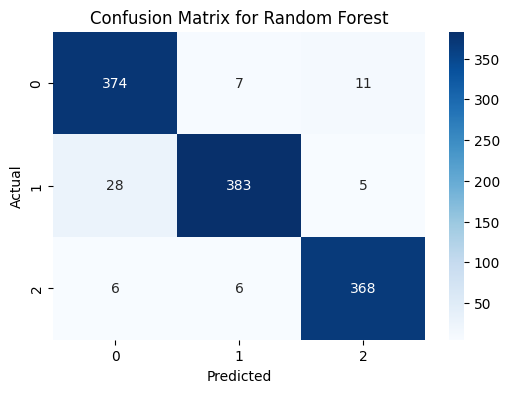

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f"Confusion Matrix for Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Artificial Nural Network

In [ ]:
ann_model=MLPClassifier()
ann_model.fit(x_train,y_train)
y_pred=ann_model.predict(x_test)

In [ ]:
accuracy_ann=accuracy_score(y_test,y_pred)
print(f"Artificial Nurel Network - Accuracy: {accuracy_ann:.4f}")
cm=confusion_matrix(y_test,y_pred)
cr=classification_report(y_test,y_pred)
print("Confusion Matrix :")
print(cm)
print("\n")
print(f"Classification Report of Artificial Nurel Network:")
print(cr)


Artificial Nurel Network - Accuracy: 0.9184
Confusion Matrix :
[[360  21  11]
 [ 27 375  14]
 [ 10  14 356]]


Classification Report of Artificial Nurel Network:
              precision    recall  f1-score   support

           0       0.91      0.92      0.91       392
           1       0.91      0.90      0.91       416
           2       0.93      0.94      0.94       380

    accuracy                           0.92      1188
   macro avg       0.92      0.92      0.92      1188
weighted avg       0.92      0.92      0.92      1188



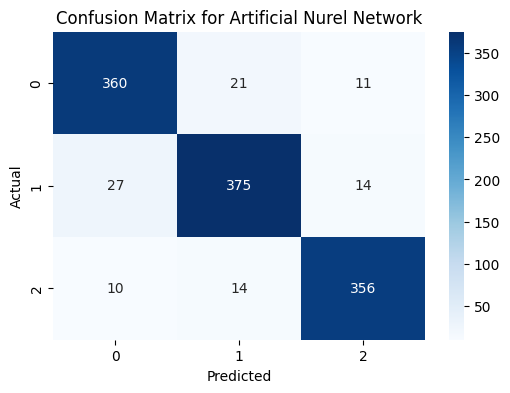

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f"Confusion Matrix for Artificial Nurel Network")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Text(0, 0.5, 'Accuracy Score')

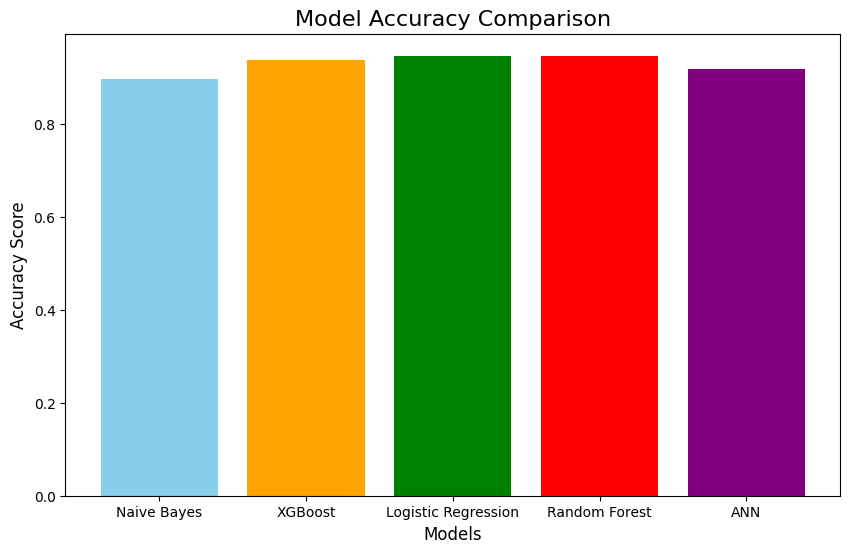

In [ ]:
model_names = ['Naive Bayes', 'XGBoost', 'Logistic Regression', 'Random Forest', 'ANN']
accuracy_scores = [accuracy_naive_bayas,accuracy_XGboost,accuracy_logistic,accuracy_random,accuracy_ann]

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracy_scores, color=['skyblue', 'orange', 'green', 'red', 'purple'])

# Add titles and labels
plt.title('Model Accuracy Comparison', fontsize=16)
plt.xlabel('Models', fontsize=12)
plt.ylabel('Accuracy Score', fontsize=12)

Random Forest model is the best model as compared to other models with accuracy score of 0.9469.

In [ ]:
print(accuracy_naive_bayas,accuracy_XGboost,accuracy_logistic,accuracy_random,accuracy_ann
)

0.8973063973063973 0.9377104377104377 0.9461279461279462 0.946969696969697 0.9183501683501684


In [ ]:
# Save the best model using joblib
joblib.dump(random_forest_model, 'best_emotion_detection_model.pkl')

print("\nBest model saved as 'best_emotion_detection_model.pkl'")


Best model saved as 'best_emotion_detection_model.pkl'


# **Testing the model with Unseen dataset**

In [ ]:
model = joblib.load('best_emotion_detection_model.pkl')

In [ ]:

data = {
    "Text": [
        "I feel so happy and excited about my future!",
        "This makes me so angry, I can’t even think straight.",
        "I am so scared of what might happen next.",
        "I feel so proud and joyful about this achievement.",
        "I feel suspicious of everyone around me right now."
    ],
    "Emotion": ["joy", "anger", "fear", "joy", "fear"]
}


sample_unseen_data = pd.DataFrame(data)


sample_unseen_data.to_csv("sample_unseen_data.csv", index=False)


print(sample_unseen_data)


                                                Text Emotion
0       I feel so happy and excited about my future!     joy
1  This makes me so angry, I can’t even think str...   anger
2          I am so scared of what might happen next.    fear
3  I feel so proud and joyful about this achievem...     joy
4  I feel suspicious of everyone around me right ...    fear


In [ ]:
Text = unseen_data['Text']

In [ ]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [ ]:
def preprocess_text(text):
    tokens = text.lower().split()
    tokens = [word for word in tokens if word not in stop_words]
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)

unseen_data['processed_text'] = Text.apply(preprocess_text)

In [ ]:
X_unseen = vectorizer.transform(unseen_data['processed_text'])

In [ ]:
model = joblib.load('best_emotion_detection_model.pkl')
predictions = model.predict(X_unseen)

In [ ]:
print("Predictions:", predictions)

Predictions: [2 1 0 2 1 0 1 2 1 2 2 1 0 2 1 0 1 2 1 2 2 1 0 2 1 0 1 2 1 2 2 1 0 2 1 0 1
 2 1 2 2 1 0 2 1 0 1 2 1 2 2 1 0 2 1 0 1 2 1 2 2 1 0 2 1 0 1 2 1 2 2 1 0 2
 1 0 1 2 1 2 2 1 0 2 1 0 1 2 1 2 2 1 0 2 1 0 1 2 1 2]


# **Conclusion**

In this project, we successfully built a model to detect emotions from text, such as joy, anger, sadness, and fear. By using techniques like data preprocessing, feature extraction, and machine learning, the Random Forest model  achieved good accuracy(accuracy score:0.9469). This work highlights the potential of NLP in understanding human emotions from text, which can be useful in areas like customer feedback analysis, mental health support, and social media monitoring